In [25]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

(450, 600, 3)
Color del pixel en la posición x= 100 | y= 100: [114   8 137]


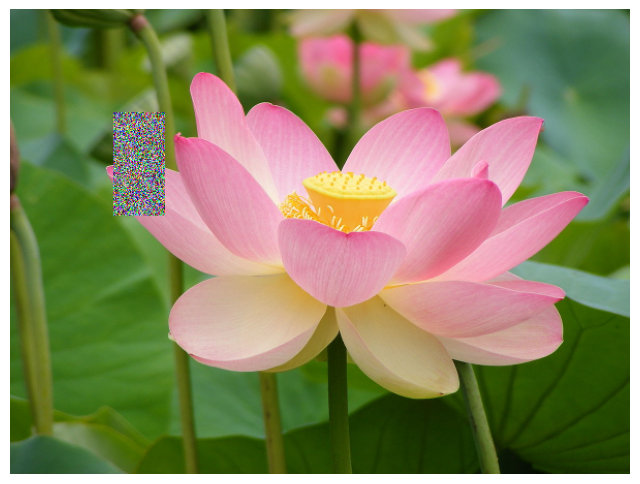

In [181]:
img = cv2.imread('images/imagen_1.jpg')
img = cv2.resize(img, None, fx = .5, fy=.5)

img[100:200, 100:150] = np.random.randint(0, 256, size=(100, 50, 3), dtype=np.uint8)

print(img.shape)

color_pixel = img[100, 100]
print(f'Color del pixel en la posición x= 100 | y= 100: {img[100, 100]}')

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


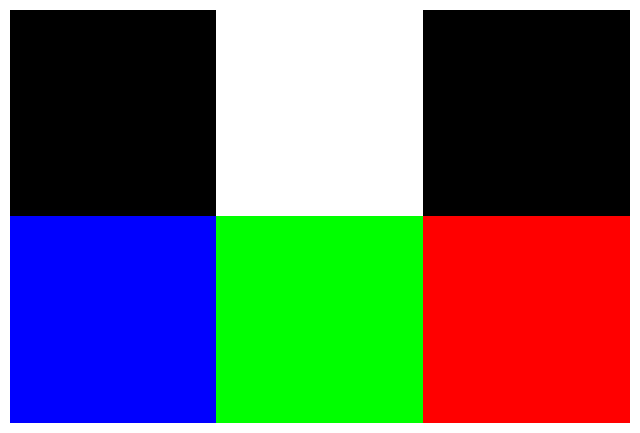

In [142]:
img_easy = np.array([
    [[0, 0, 0], [255, 255, 255], [0, 0, 0]],
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
], dtype=np.uint8)

img_resize = cv2.resize(img_easy, (300,200), interpolation = cv2.INTER_CUBIC)

cv2.imshow('Image', img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_easy)
ax.imshow(cv2.cvtColor(img_easy, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

In [69]:
cap = cv2.VideoCapture(0)

width = int(cap.get(3))
height = int(cap.get(4))

while True:
    ret, frame = cap.read()
    cv2.imshow('frame', frame)

    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.putText(img, 'Tim is Great!', (10, height - 10), font, 2, (0, 0, 0), 5, cv2.LINE_AA)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [125]:
from datetime import datetime

cap = cv2.VideoCapture(0)
width = int(cap.get(3))
height = int(cap.get(4))
font = cv2.FONT_HERSHEY_SIMPLEX

while True:
    ret, frame = cap.read()

    now = datetime.now()
    date_time_str = now.strftime("%Y-%m-%d %H:%M:%S")

    overlay = frame.copy()
    cv2.rectangle(frame, (width-210, height-40), (width, height), (128, 128, 128), thickness=-1)

    alpha = 0.3
    frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

    cv2.putText(frame, date_time_str, (width-200, height-15), font, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

width: 640.0 | height: 480.0 | fps: 30.0


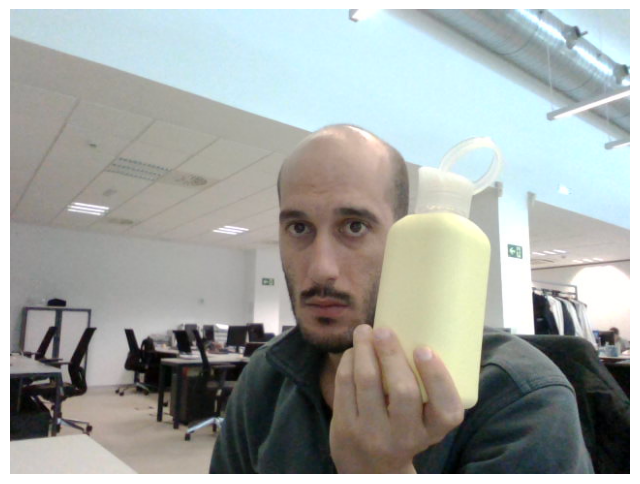

In [214]:
cap = cv2.VideoCapture(0)

ret, frame = cap.read()

width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cap.get(cv2.CAP_PROP_FPS)

print(f'width: {width} | height: {height} | fps: {fps}')

cap.release()

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


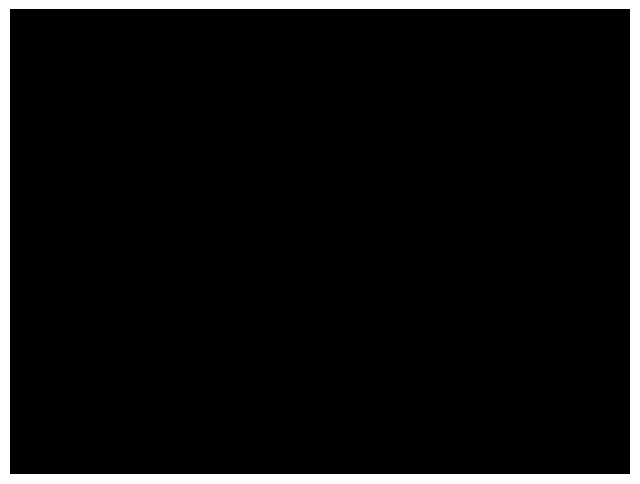

In [236]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower_yw = cv2.cvtColor(np.array([[[35, 90, 74]]], dtype=np.uint8), cv2.COLOR_BGR2HSV)
upper_yw = cv2.cvtColor(np.array([[[3, 183, 248]]], dtype=np.uint8), cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv, lower_yw, upper_yw)
result = cv2.bitwise_and(frame, frame, mask=mask)

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()